In [3]:
import xarray as xr
import matplotlib.pyplot as plt

datapath = f'/g/data/fy29/mjl561/cylc-run/rns_ostia_2019_bushfire/netcdf'

In [19]:
variable = 'stratiform_rainfall_flux'
da1 = xr.open_dataset(f'{datapath}/{variable}/E5L_1_CCI_WC_{variable}.nc')[variable]

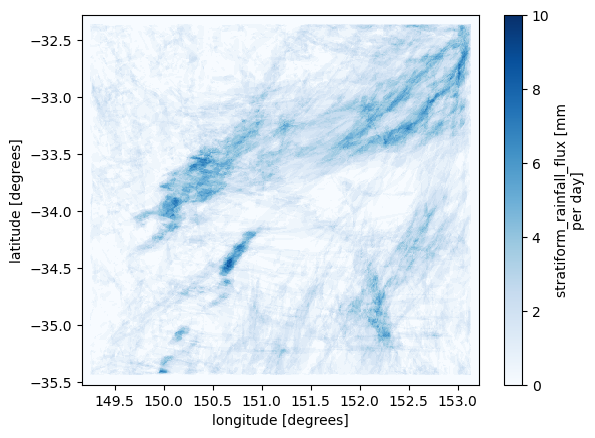

In [31]:
# calculate mean rain per day
s_in_day = 86400
da1_mean = da1.mean(dim='time')*s_in_day
da1_mean.attrs['units'] = 'mm per day'

da1_mean.plot(cmap = 'Blues', vmin=0, vmax=10)

Text(0.5, 1.0, 'Mean Rainfall per Day')

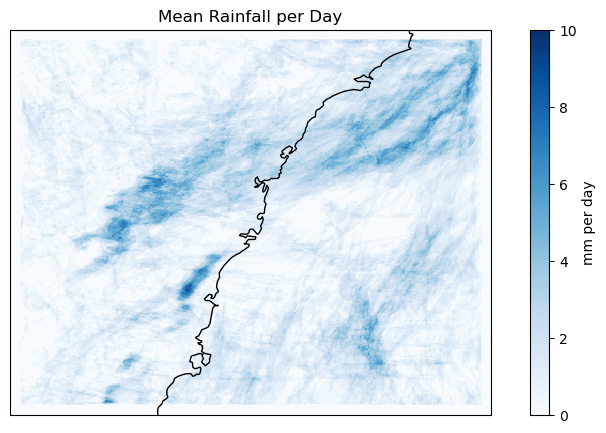

In [35]:
# now plot with cartopy
import cartopy.crs as ccrs

fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
da_mean.plot(ax=ax, cmap='Blues', vmin=0, vmax=10, 
             cbar_kwargs={'label': 'mm per day'}, transform=ccrs.PlateCarree())
ax.coastlines()
ax.set_title('Mean Rainfall per Day')